# 1. Business Problem Understanding

**Context:**  
Online fashion and cosmetics sellers in Thailand use Facebook Live to market their products. Each post generates varying levels of user engagement in the form of likes, comments, and shares.

**Business Problem:**  
Online retailers want to understand which types of Facebook posts lead to higher engagement. By identifying patterns in successful posts, businesses can optimize their content strategy to boost visibility and customer interaction.

**Key Business Questions:**
- What type of posts (video, status, link) receive higher engagement?
- Does the time of posting (hour/day/month) influence engagement?
- Can we cluster posts into distinct engagement behavior groups?

**Dataset Description:**
- **Subject Area:** Business, Social Media Marketing
- **Instances:** 7051 Facebook posts
- **Features:** 11, mostly integer-based
- **Feature Type:** Multivariate (post type, engagement metrics, time)
- **Task Type:** Clustering (unsupervised learning)

**Objective:**  
Use clustering techniques (e.g., K-Means) and PCA to group posts based on user engagement metrics and content characteristics. Identify key patterns that distinguish high-performing posts from low-performing ones.




# 1.1 Goal

**Main Goal:**  
Develop an end-to-end machine learning solution using unsupervised learning techniques to discover engagement patterns in Facebook Live posts by Thai sellers.

**Machine Learning Objective:**  
Apply clustering (K-Means) to identify groups of posts with similar engagement behaviors. Use PCA for dimensionality reduction. The insights gained will help businesses improve their social media marketing strategy.


# 2.Data Understanding & Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kolli\Downloads\my own project datasets\Live_20210128.csv")
pd.set_option('display.max_columns', None)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# Data Understanding

In [3]:
df.shape

(7050, 16)

**The dataset contains 7050 rows and 16 columns**

In [4]:
df.size

112800

**The size of the data set is 112800**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

**The dataset contains 2 object data type and 9 int data type and 4 float data type**
-  **The last 4 columns has all null so it is not useful**
- **No missing values except the last 4 columns**

In [6]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

**status_id** : It gives one feature has one number like a serial number

**status_type** : It represents the which format of status type i.e., video, audio, link or status

**status_published** : It represents the status was published date with time

**num_reactions** : It represents how many members are reacted with that particular status

**num_comments** : It represents how many members are comment the particular status

**num_shares** : It represents the how many menbers are shared the particular video

**num_likes** : It represent the how many members are liked the video

**num_loves** : It represent the no.of people send the love symbols

**num_wows** : It represent the no.of people send wows

**num_hahas** : It represent the no.of people send the hahas

**num_sads** : It repreent the  no.of people send the sad symbols

**num_angry** : It represents the no.of people angry with that video or status

**column 1, 2, 3 & 4 are the all null values it is not useful for analysis so i drop it in data cleaning**

In [7]:
df.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

- It shows all columns with data types
- The status_published column in object format it converted to date format in data cleaning

In [8]:
continious = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
categorical = ['status_type']
timeseries = ['status_published']

# 3.Exploratory Data Analysis

In [9]:
df[continious].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**num_reactions** : num of reactions is minimum of 0 with maximum of 4710 an std is 462.6.

**num_comments** : num of comments minimum is 0 and max is 20990 with std is 889.6

**num_shates** : num of shares min 0 and max 3424 with std is 131.5

**num_likes** : num of likes min 0 and max is 4710 and std is 449.4

**num_loves** : num of loves min 0 and max is 657 with std is 39.9

**num_wows** : num of wows min 0 and max is 278 with std is 8.71

**num_hahas** : num of hahas min is 0 and max is 157 with std is 3.9

**num_sads** : num of sads min is 0 and max is 51 with std is 1.5

**num_angrys** : num of angrys min 0 and max is 31 with std is 0.7

In [10]:
df[categorical].describe()

,status_type
count,7050
unique,4
top,photo
freq,4288


**status_type** : It has 4 unique values and top photo

**status_published** : It has 90% unique values

In [11]:
df[continious].skew()

num_reactions     3.738452
num_comments      9.028850
num_shares        7.099332
num_likes         3.919128
num_loves         6.004845
num_wows         18.246813
num_hahas        20.305741
num_sads         17.578868
num_angrys       19.507129
dtype: float64

**all continious values are right skewed**

In [12]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

**status_type has 4 unique values i.e., video, photo, link, status**

In [13]:
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

**More status are uploaded via photo type**

In [14]:
df['status_published'].nunique()

6913

**The status_published has 6913 unique values**

In [15]:
df['num_reactions'].nunique()

1067

**The num of reacion has 1067 unique values**

In [16]:
df['num_comments'].nunique()

993

**The num of comments has 903 unique values**

In [17]:
df['num_shares'].nunique()

501

**The num of shares has 501 unique values**

In [18]:
df['num_likes'].nunique()

1044

**The num of likes has 1044 unique values**

In [19]:
df['num_loves'].nunique()

229

**The num of loves has 229 unique values**

In [20]:
df['num_wows'].nunique()

65

**The num of wows has 65 unique values**

In [21]:
df['num_hahas'].nunique()

42

**The num of hahas has 42 unique values**

In [22]:
df['num_sads'].nunique()

24

**The num of sads has 24 unique values**

In [23]:
df['num_angrys'].nunique()

14

**The num of angrys has 14 unique values**

**Histogram plots for continious data**

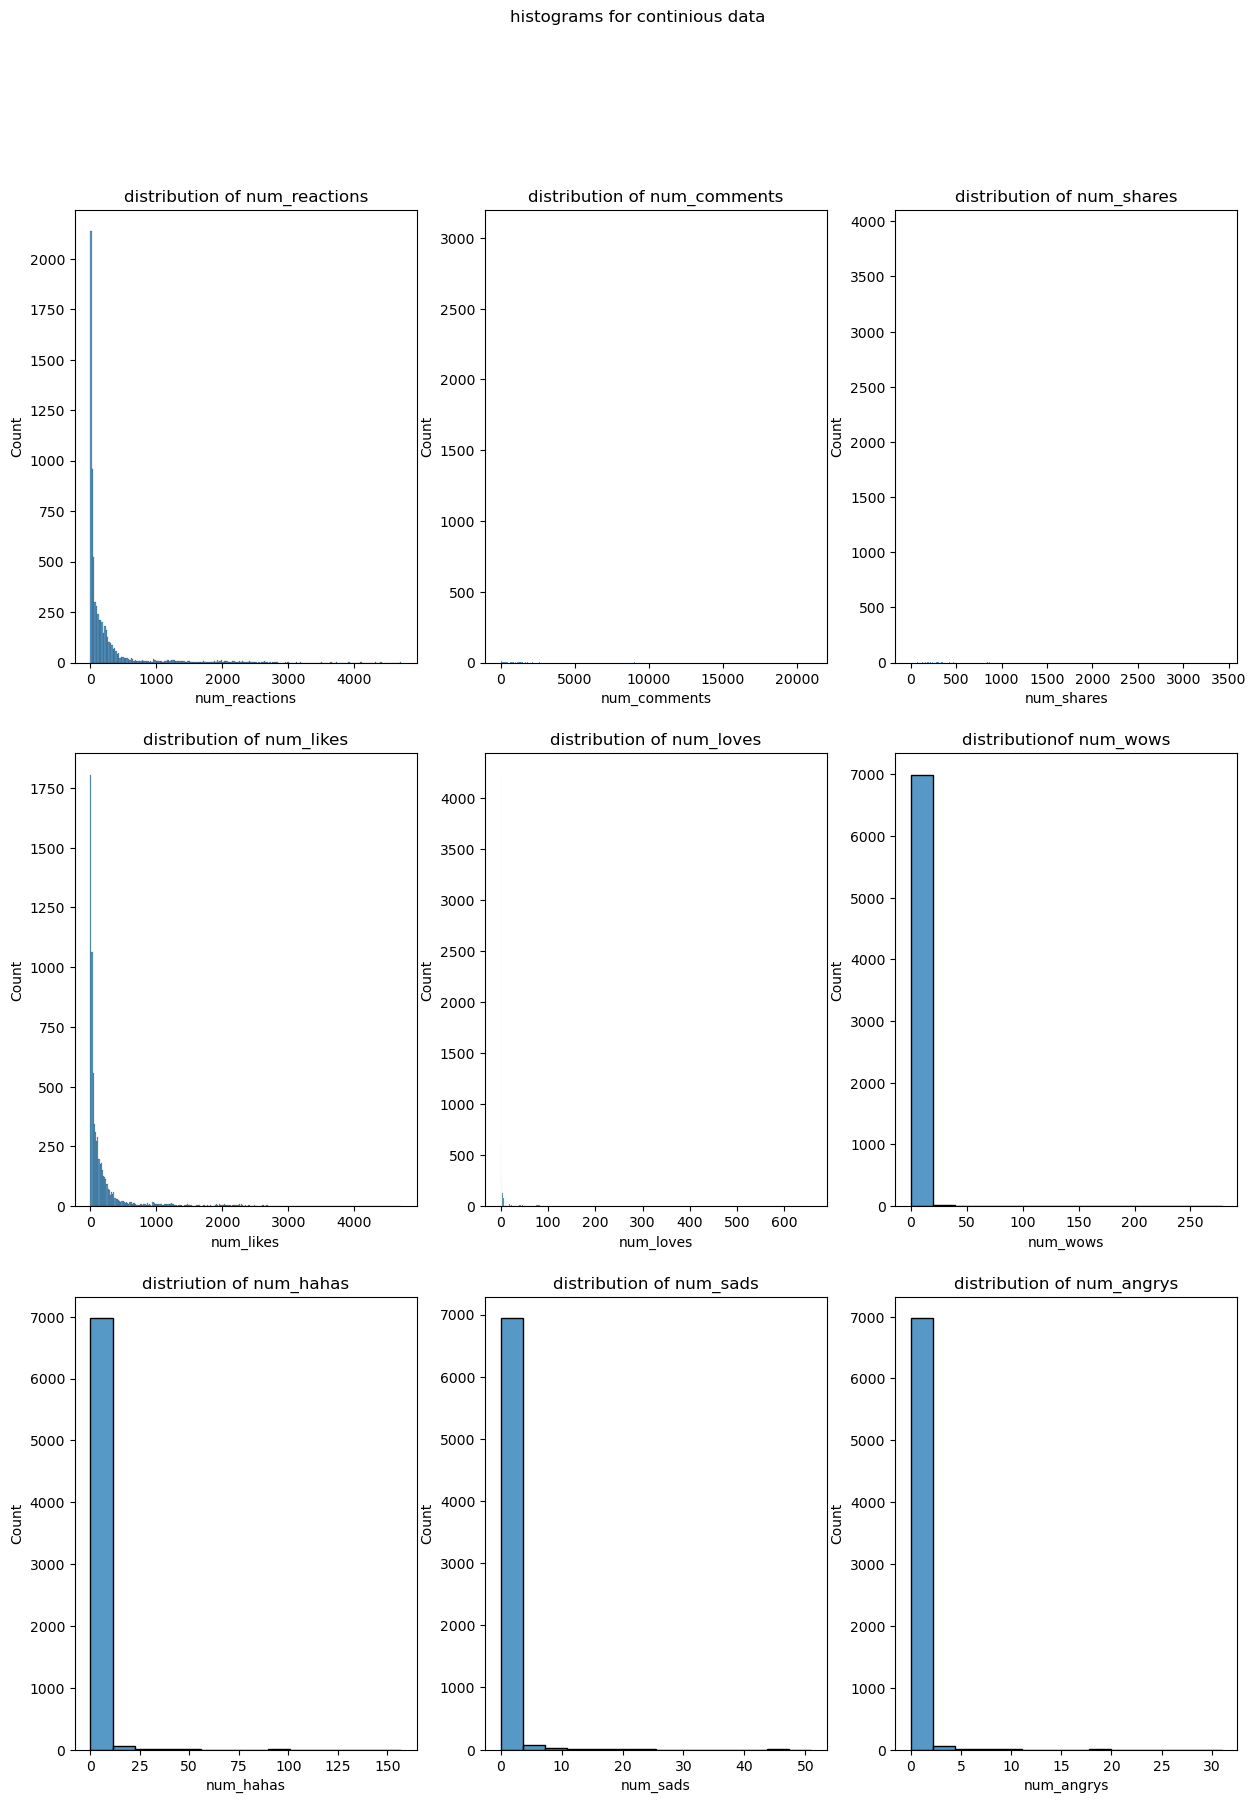

In [24]:
plt.figure(figsize=(15,20))
plt.suptitle("histograms for continious data")

plt.subplot(3,3,1)
sns.histplot(df['num_reactions'])
plt.title('distribution of num_reactions')
plt.xlabel('num_reactions')
#plt.ylabel('count')

plt.subplot(3,3,2)
sns.histplot(df['num_comments'])
plt.title('distribution of num_comments')
plt.xlabel('num_comments')
#plt.ylabel('count')

plt.subplot(3,3,3)
sns.histplot(df['num_shares'])
plt.title('distribution of num_shares')
plt.xlabel('num_shares')
#plt.ylabel('count')

plt.subplot(3,3,4)
sns.histplot(df['num_likes'])
plt.title('distribution of num_likes')
plt.xlabel('num_likes')
#plt.ylabel('count')

plt.subplot(3,3,5)
sns.histplot(df['num_loves'])
plt.title('distribution of num_loves')
plt.xlabel('num_loves')
#plt.ylabel('count')

plt.subplot(3,3,6)
sns.histplot(df['num_wows'])
plt.title('distributionof num_wows')
plt.xlabel('num_wows')
#plt.ylabel('count')

plt.subplot(3,3,7)
sns.histplot(df['num_hahas'])
plt.title('distriution of num_hahas')
plt.xlabel('num_hahas')
#plt.ylabel('count')

plt.subplot(3,3,8)
sns.histplot(df['num_sads'])
plt.title('distribution of num_sads')
plt.xlabel('num_sads')
#plt.ylabel('count')

plt.subplot(3,3,9)
sns.histplot(df['num_angrys'])
plt.title('distribution of num_angrys')
plt.xlabel('num_angrys')
#plt.ylabel('count')

plt.show()


**num_reactions** : The more num of reactions under 1000 with high count is 2000+

**num_comments** : The no of comments below 5000 with high around 200 to 250

**num_shares** : The num of shares below 500

**num_likes** : The num of likes around 2000 the most high 1750+ in 0

**num_loves** : The num of loves is lessthan 100

**num_wows** : The num of wows has under 50 with most 0 to 20 has the high i.e., 7000+

**num_hahas** : The num of hahas below 25, 0 to 10 has the high hahas

**num_sads** : below 10 with most 0 to 5 has the high sads

**num_angrys** : below 5 with most 0 to 2.5 has highest

**Box plots for continious data**

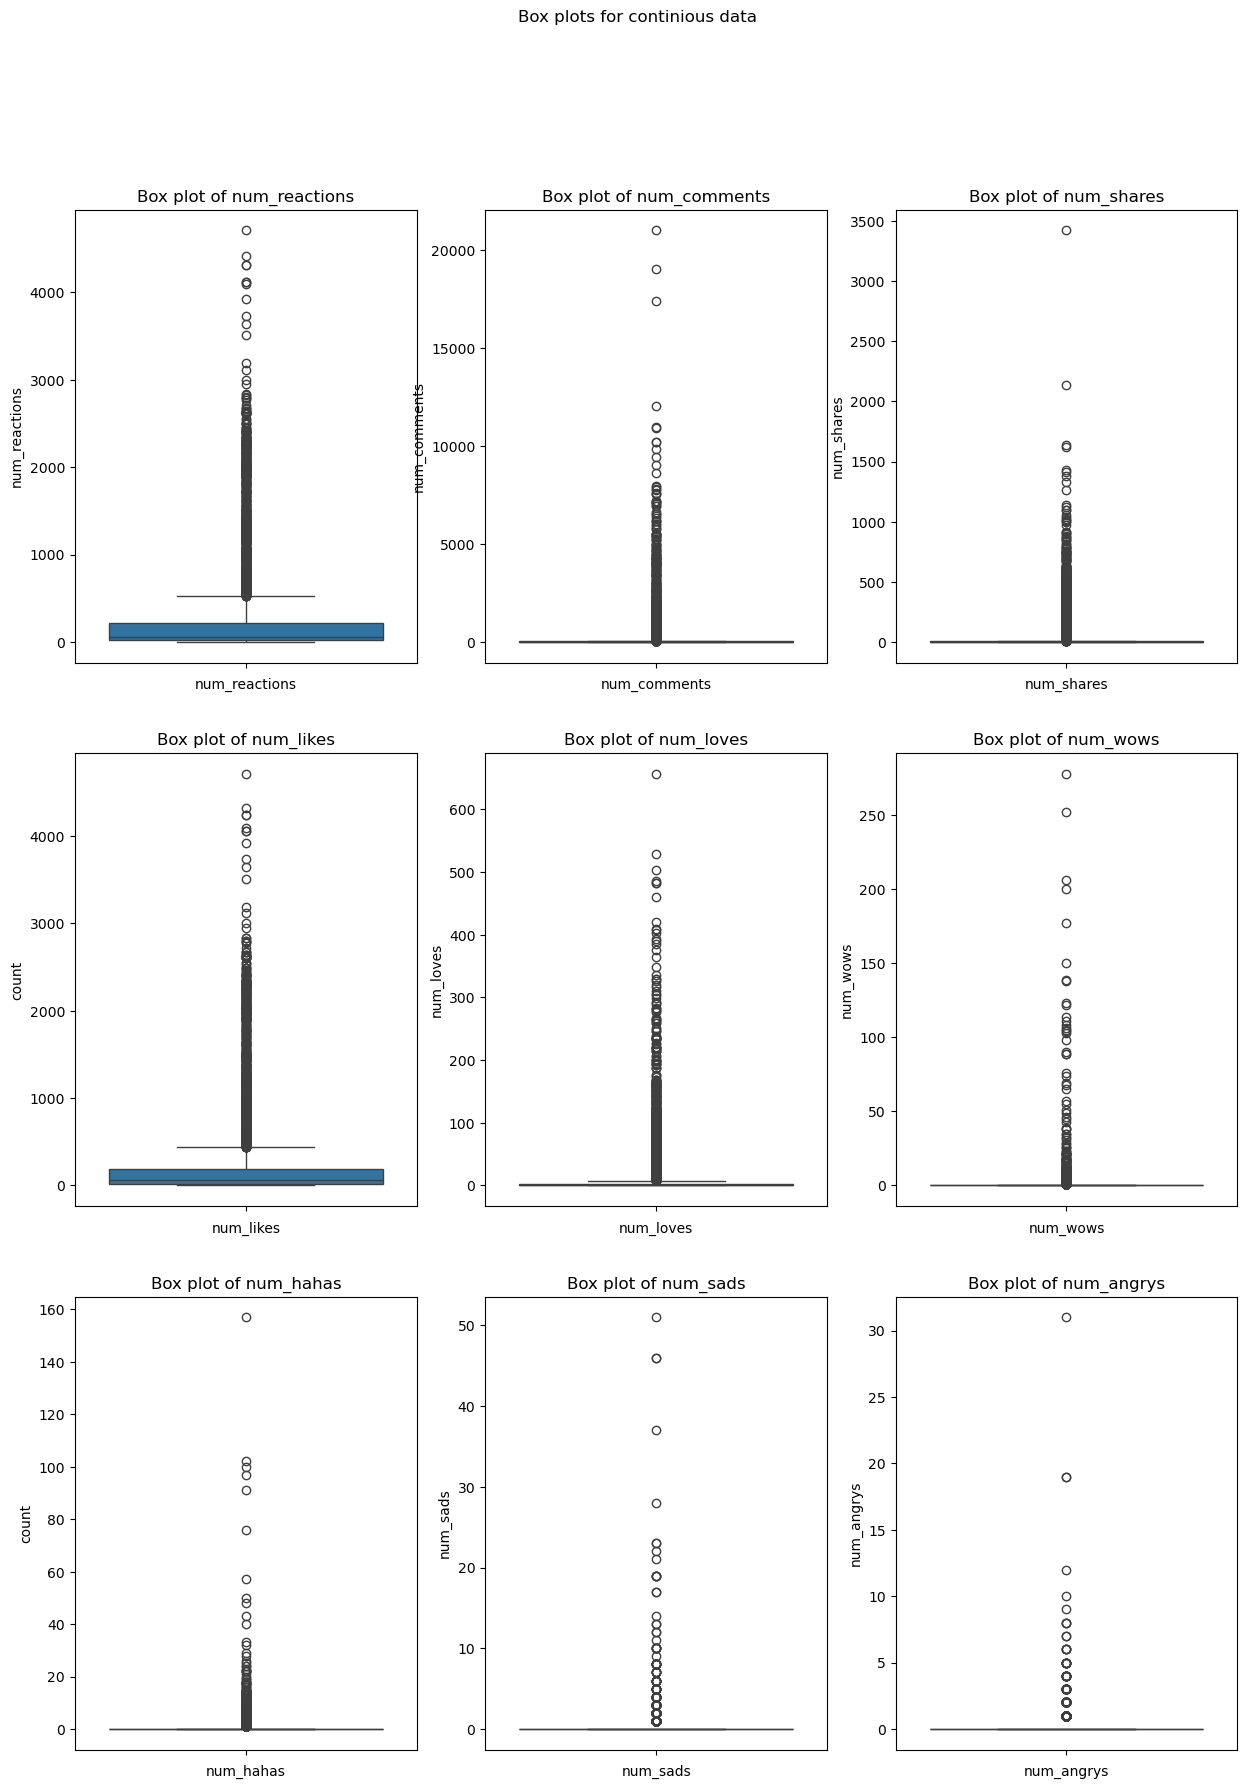

In [25]:
plt.figure(figsize = (15,20))
plt.suptitle("Box plots for continious data")

plt.subplot(3,3,1)
sns.boxplot(df['num_reactions'])
plt.title('Box plot of num_reactions')
plt.xlabel('num_reactions')
#plt.ylabel('count')

plt.subplot(3,3,2)
sns.boxplot(df['num_comments'])
plt.title('Box plot of num_comments')
plt.xlabel('num_comments')
#plt.ylabel('count')

plt.subplot(3,3,3)
sns.boxplot(df['num_shares'])
plt.title('Box plot of num_shares')
plt.xlabel('num_shares')
#plt.ylabel('count')

plt.subplot(3,3,4)
sns.boxplot(df['num_likes'])
plt.title('Box plot of num_likes')
plt.xlabel('num_likes')
plt.ylabel('count')

plt.subplot(3,3,5)
sns.boxplot(df['num_loves'])
plt.title('Box plot of num_loves')
plt.xlabel('num_loves')
#plt.ylabel('count')

plt.subplot(3,3,6)
sns.boxplot(df['num_wows'])
plt.title('Box plot of num_wows')
plt.xlabel('num_wows')
#plt.ylabel('count')

plt.subplot(3,3,7)
sns.boxplot(df['num_hahas'])
plt.title('Box plot of num_hahas')
plt.xlabel('num_hahas')
plt.ylabel('count')

plt.subplot(3,3,8)
sns.boxplot(df['num_sads'])
plt.title('Box plot of num_sads')
plt.xlabel('num_sads')
#plt.ylabel('count')

plt.subplot(3,3,9)
sns.boxplot(df['num_angrys'])
plt.title('Box plot of num_angrys')
plt.xlabel('num_angrys')
#plt.ylabel('count')

plt.show()



**all continious values has outliers, retrain the data**

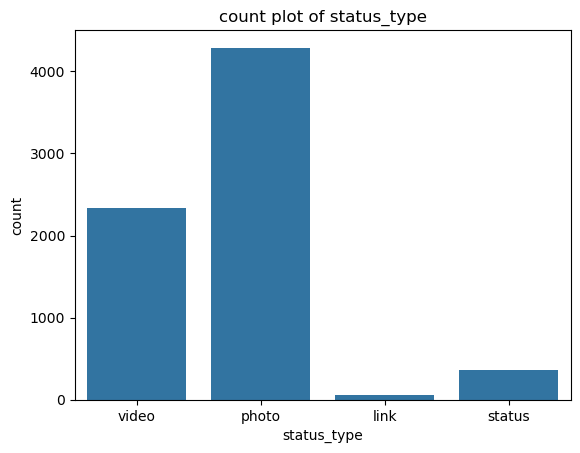

In [26]:
sns.countplot(x = df['status_type'])
plt.title('count plot of status_type')
plt.xlabel('status_type')
#plt.ylabel('count')
plt.show()

**It gives the photo has more reacted**

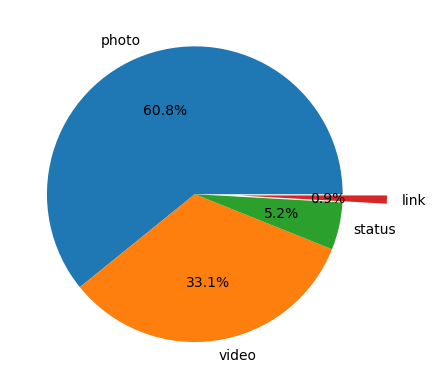

In [27]:
plt.pie(df['status_type'].value_counts(), labels = df['status_type'].value_counts().index, autopct='%0.1f%%', explode =[ 0.0, 0.0, 0.0, 0.3])
plt.show()

**The pie plot also gives the same**

In [28]:
#correlation
df[continious].corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


-  num of reactions more corelated with num of likes
- num of comments is medium  related with num of shares while compared to others
- num shares more corelated with num of loves
- num likes more corelated with num of reactions
- num of loves more corelated with num of shares
- num_wows is medium corelated with num loves while compares to other columns
- num of wows of also medium corelation with num of loves
- num of hahas is medium corelated with num of loves
- num_sads with less correlation with all features
- num_angrys is also less corelation with all features

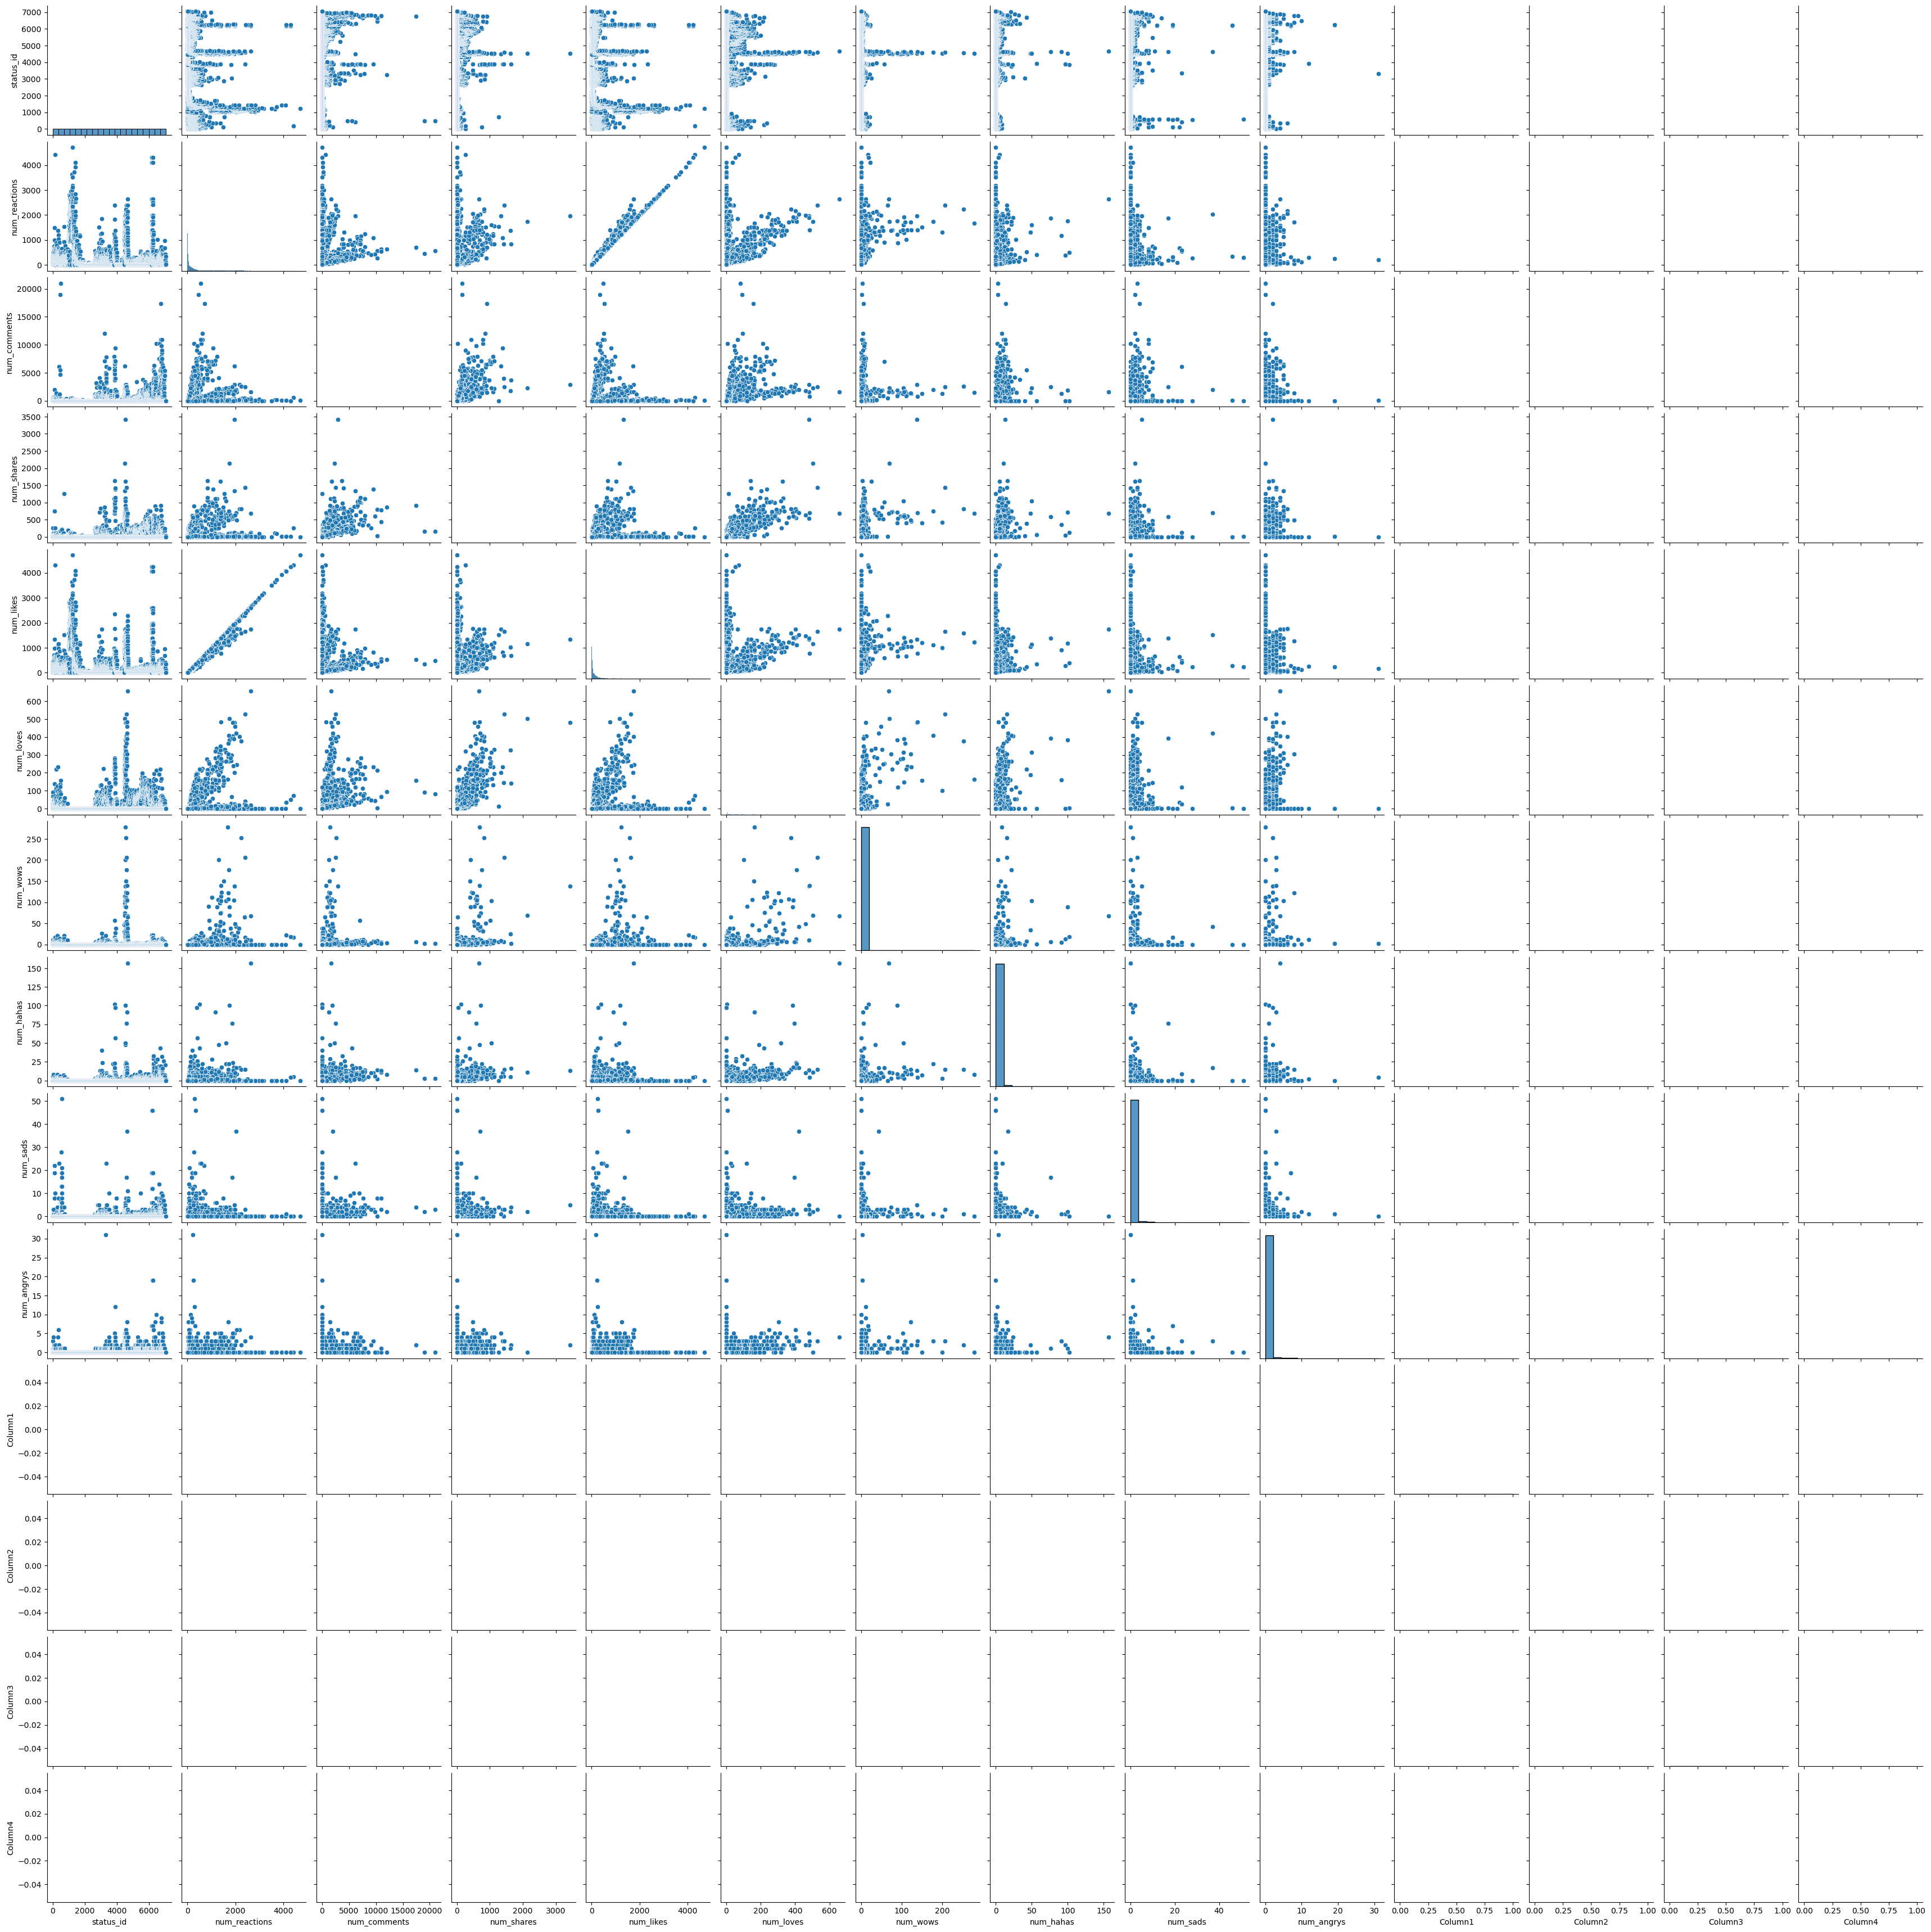

In [29]:
#multivariate plot
sns.pairplot(df)
plt.show()

# 4.Data Cleaning

-  **1.Wrong Data**
- **2.Wrong Data Type**
- **3.Missing values**
- **4.Duplicaates**
- **5.Outliers**
- **6.Variable Selection**

**1. Wrong Data** --> No Wrong Data

**2.Wrong Data Type**

In [30]:
df['status_published'].dtypes

dtype('O')

In [31]:
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

-  **errors='coerce' will convert invalid formats to NaT (missing time)**

**3. Missing Values**

In [32]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

**The column 1, 2,3 & 4 has all null values so drop the columns**

In [33]:
df.drop(['status_id','Column1', 'Column2', 'Column3', 'Column4'], axis = 1, inplace = True)

**drop the four columns due to there is no value present in that column**


**4.Duplicates**

In [34]:
df.duplicated().sum()

np.int64(54)

**No duplicate values on the data set**

**5.Outliers**

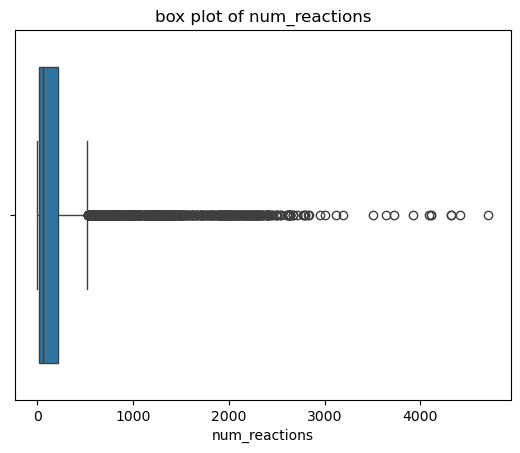

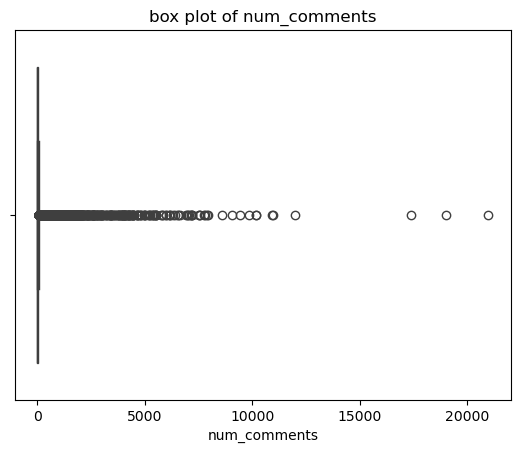

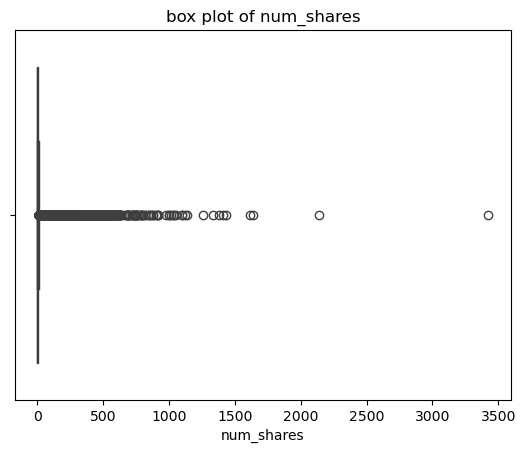

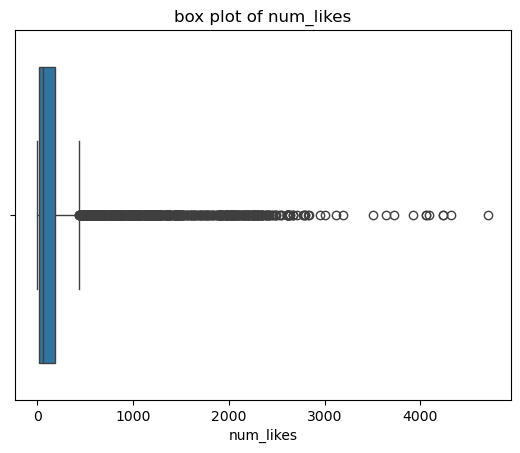

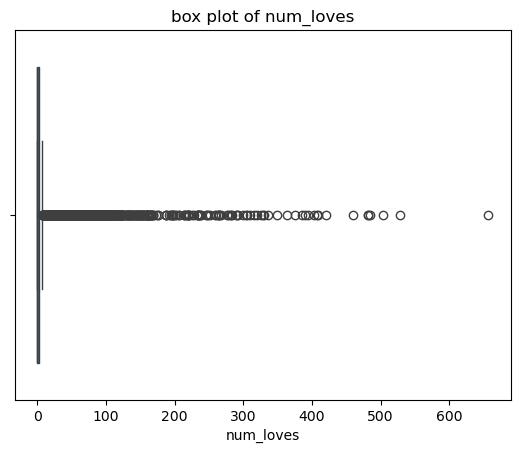

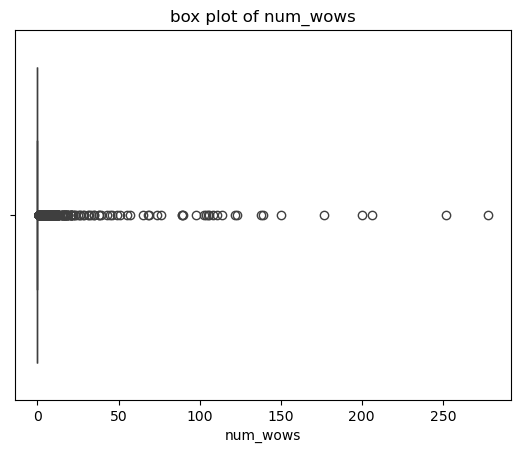

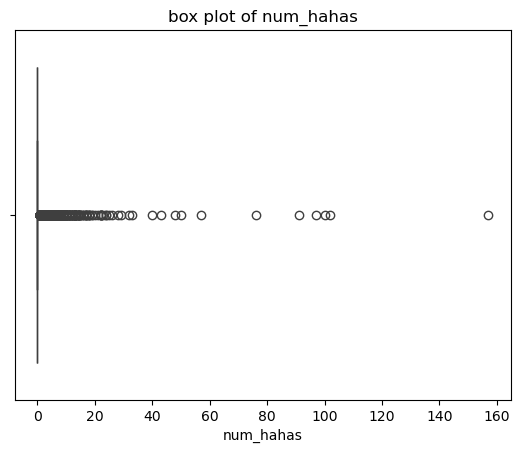

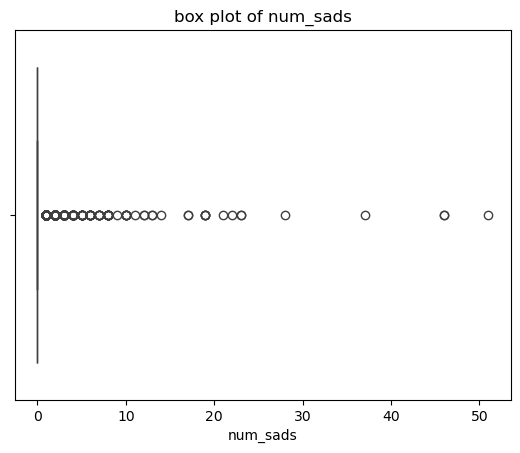

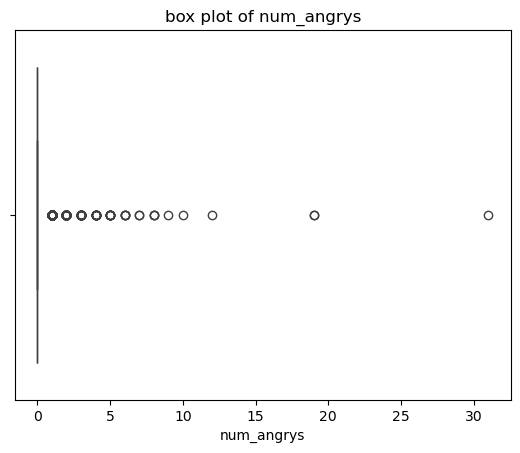

In [35]:
for i in continious:
  sns.boxplot(x = df[i])
  plt.title(f"box plot of {i}")
  plt.show()

**all columns has the outliers i retrain the data**

**6. Variable Selection** : **Based on columns we can add or delete the data**

In [36]:
df['total_engagement'] = df['num_reactions'] + df['num_comments'] + df['num_shares']

In [37]:
df.drop(columns=['num_reactions', 'num_comments', 'num_shares'], axis = 1, inplace = True)

**Why? Represents the overall impact of a post — the more total engagement, the more effective the post.**

**Time-Based Features from status_published**

In [38]:
df['post_hour'] = df['status_published'].dt.hour         # Useful for hourly trends
df['post_day'] = df['status_published'].dt.dayofweek     # 0=Monday, 6=Sunday
df['post_month'] = df['status_published'].dt.month       # Monthly seasonality

**To analyze patterns across posting times**

In [39]:
cont_cols = ['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'total_engagement']

**applying Root Transformation**

In [40]:
df['num_likes_root'] = df['num_likes'] ** (1/6)
df['num_likes_root'].skew()

np.float64(0.09756492498224154)

In [41]:
df['num_loves_root'] = df['num_loves'] ** (1/9)
df['num_loves_root'].skew()

np.float64(0.5962120367431896)

In [42]:
df['num_wows_root'] = df['num_wows'] ** (1/9)
df['num_wows_root'].skew()

np.float64(1.2432918833965843)

In [43]:
df['num_hahas_root'] = df['num_hahas'] ** (1/5)
df['num_hahas_root'].skew()

np.float64(2.0650146398837164)

In [44]:
df['num_sads_root'] = df['num_sads'] ** (1/3)
df['num_sads_root'].skew()

np.float64(3.727630473544409)

In [45]:
df['num_angrys_root']  = df['num_angrys'] ** (1/4)
df['num_angrys_root'].skew()

np.float64(3.944207187867072)

In [46]:
df['total_engagement_root'] = df['total_engagement'] ** (1/7)
df['total_engagement_root'].skew()

np.float64(0.11433043899693435)

**apply Logarithmic Transformation**

In [47]:
df['num_likes_log'] = np.log(df['num_likes'] + 1)
df['num_likes_log'].skew()

np.float64(-0.014455421866580161)

In [48]:
df['num_loves_log'] = np.log(df['num_loves'] + 0.01)
df['num_loves_log'].skew()

np.float64(0.7026491008074345)

In [49]:
df['num_wows_log'] = np.log(df['num_wows'] + 0.01)
df['num_wows_log'].skew()

np.float64(1.3292893763257887)

In [50]:
df['num_hahas_log'] = np.log(df['num_hahas'] + 0.01)
df['num_hahas_log'].skew()

np.float64(1.981443478482547)

In [51]:
df['num_sads_log'] = np.log(df['num_sads'] + 0.01)
df['num_sads_log'].skew()

np.float64(3.0956283207327466)

In [52]:
df['num_angrys_log'] = np.log(df['num_angrys'] + 0.05)
df['num_angrys_log'].skew()

np.float64(3.929963970939175)

In [53]:
df['total_engagement_log'] = np.log(df['total_engagement'] + 0.05)
df['total_engagement_log'].skew()

np.float64(-0.417616509595523)

**apply Box cox Transformation**

In [54]:
from scipy import stats
df['num_likes_box'] = stats.boxcox(df['num_likes'] + 0.01)[0]
df['num_likes_box'].skew()

np.float64(0.05648214911711891)

In [55]:
df['num_loves_box'] = stats.boxcox(df['num_loves'] + 0.01)[0]
df['num_loves_box'].skew()

np.float64(0.4746619646278324)

In [56]:
df['num_wows_box'] = stats.boxcox(df['num_wows'] + 0.02)[0]
df['num_wows_box'].skew()

np.float64(1.174296299427937)

In [57]:
df['num_hahas_box'] = stats.boxcox(df['num_hahas'] + 0.01)[0]
df['num_hahas_box'].skew()

np.float64(1.8466608238370734)

In [58]:
df['num_sads_box'] = stats.boxcox(df['num_sads'] + 0.01)[0]
df['num_sads_box'].skew()

np.float64(2.9516801221702735)

In [59]:
df['num_angrys_box'] = stats.boxcox(df['num_angrys'] + 0.01)[0]
df['num_angrys_box'].skew()

np.float64(3.706257064635783)

In [60]:
df['total_engagement_box'] = stats.boxcox(df['total_engagement'] + 0.01)[0]
df['total_engagement_box'].skew()

np.float64(0.019405835543439377)

In [61]:
df.drop(columns = ['num_likes_box', 'num_likes_root', 'num_likes', 'num_loves_root', 'num_loves_log', 'num_loves', 'num_wows_root', 'num_wows_log', 'num_wows', 'num_hahas_root', 'num_hahas_log', 'num_hahas','num_sads_root','num_sads_log', 'num_sads', 'num_angrys_root', 'num_angrys_log', 'num_angrys', 'total_engagement_root', 'total_engagement_log', 'total_engagement' ], axis = 1, inplace = True)

In [62]:
df.head()

,status_type,status_published,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box
0,video,2018-04-22 06:00:00,6,6,4,6.070738,2.913048,0.749249,0.009896,0.009841,-1.434690e+06,9.739125
1,photo,2018-04-21 22:45:00,22,5,4,5.017280,-7.787403,-24.125185,-146.546615,-12976.854134,-1.434690e+06,6.186164
2,video,2018-04-21 06:17:00,6,5,4,5.323010,2.246036,0.019655,0.009896,-12976.854134,-1.434690e+06,8.152731
3,photo,2018-04-21 02:29:00,2,5,4,4.718499,-7.787403,-24.125185,-146.546615,-12976.854134,-1.434690e+06,5.739052
4,photo,2018-04-18 03:22:00,3,2,4,5.323010,1.758665,-24.125185,-146.546615,-12976.854134,-1.434690e+06,6.720860


In [63]:
continious = ['num_likes_log', 'num_loves_box', 'num_wows_box', 'num_hahas_box', 'num_sads_box', 'num_angrys_box', 'total_engagement_box']
categorical = ['status_type']
timeseries = ['status_published']

In [64]:
#calculate Outliers
Q1 = df[continious].quantile(0.25)
Q3 = df[continious].quantile(0.75)
IQR = Q3 - Q1
print("IQR:",IQR)

#calculate of lower limit
l_limit = Q1 - 1.5 * IQR
print("Lower Limit:",l_limit)

#calculate of upper limit
u_limit = Q3 + 1.5 * IQR
print("Upper Limit:",u_limit)

IQR: num_likes_log           2.334027
num_loves_box           8.770528
num_wows_box            0.000000
num_hahas_box           0.000000
num_sads_box            0.000000
num_angrys_box          0.000000
total_engagement_box    4.468975
dtype: float64
Lower Limit: num_likes_log          -6.106690e-01
num_loves_box          -2.094320e+01
num_wows_box           -2.412518e+01
num_hahas_box          -1.465466e+02
num_sads_box           -1.297685e+04
num_angrys_box         -1.434690e+06
total_engagement_box   -3.375759e+00
dtype: float64
Upper Limit: num_likes_log           8.725440e+00
num_loves_box           1.413892e+01
num_wows_box           -2.412518e+01
num_hahas_box          -1.465466e+02
num_sads_box           -1.297685e+04
num_angrys_box         -1.434690e+06
total_engagement_box    1.450014e+01
dtype: float64


In [65]:
#df[(df[continious]<l_limit) | (df[continious]>u_limit)]

In [66]:
#retrain the data because of all the correct data

**Encoding -- Dummy Encoding**

In [67]:
# Perform one-hot encoding on 'status_type'
df = pd.get_dummies(df, columns=['status_type'], drop_first=False)
display(df.head())

,status_published,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box,status_type_link,status_type_photo,status_type_status,status_type_video
0,2018-04-22 06:00:00,6,6,4,6.070738,2.913048,0.749249,0.009896,0.009841,-1.434690e+06,9.739125,False,False,False,True
1,2018-04-21 22:45:00,22,5,4,5.017280,-7.787403,-24.125185,-146.546615,-12976.854134,-1.434690e+06,6.186164,False,True,False,False
2,2018-04-21 06:17:00,6,5,4,5.323010,2.246036,0.019655,0.009896,-12976.854134,-1.434690e+06,8.152731,False,False,False,True
3,2018-04-21 02:29:00,2,5,4,4.718499,-7.787403,-24.125185,-146.546615,-12976.854134,-1.434690e+06,5.739052,False,True,False,False
4,2018-04-18 03:22:00,3,2,4,5.323010,1.758665,-24.125185,-146.546615,-12976.854134,-1.434690e+06,6.720860,False,True,False,False


**Feature Scalling**

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[continious] = scaler.fit_transform(df[continious])
display(df.head())

,status_published,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box,status_type_link,status_type_photo,status_type_status,status_type_video
0,2018-04-22 06:00:00,6,6,4,1.188102,1.512520,1.770333,2.276237,3.257940,-0.252646,1.337542,False,False,False,True
1,2018-04-21 22:45:00,22,5,4,0.565108,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.213846,False,True,False,False
2,2018-04-21 06:17:00,6,5,4,0.745911,1.367905,1.701607,2.276237,-0.306938,-0.252646,0.835813,False,False,False,True
3,2018-04-21 02:29:00,2,5,4,0.388415,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.072438,False,True,False,False
4,2018-04-18 03:22:00,3,2,4,0.745911,1.262238,-0.572764,-0.437816,-0.306938,-0.252646,0.382955,False,True,False,False


**Prepare Data for Clustering**

In [69]:
# Drop the 'status_published' column as it's not needed for clustering
df_clustering = df.drop(columns=['status_published'])

# Define the features for clustering
# These include the scaled continuous variables and the one-hot encoded status types
X = df_clustering.copy()

# Display the first few rows of the data used for clustering
display(X.head())

,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box,status_type_link,status_type_photo,status_type_status,status_type_video
0,6,6,4,1.188102,1.512520,1.770333,2.276237,3.257940,-0.252646,1.337542,False,False,False,True
1,22,5,4,0.565108,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.213846,False,True,False,False
2,6,5,4,0.745911,1.367905,1.701607,2.276237,-0.306938,-0.252646,0.835813,False,False,False,True
3,2,5,4,0.388415,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.072438,False,True,False,False
4,3,2,4,0.745911,1.262238,-0.572764,-0.437816,-0.306938,-0.252646,0.382955,False,True,False,False


**Elbow Curve**

In [70]:
from sklearn.cluster import KMeans

In [71]:
wccs = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X)
  wccs.append(kmeans.inertia_)
print(wccs)

[506589.13290780113, 241337.97098384163, 189557.17154537977, 152280.82015179942, 143151.00750138354, 120500.0575611235, 112770.29158082932, 106545.5765348567, 107282.1310828647, 97185.77843028626]


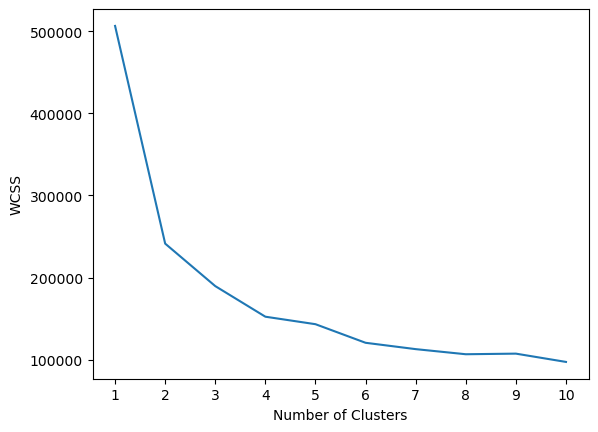

In [72]:
plt.plot(range(1,11),wccs)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# K - Means Model

In [73]:
#Modelling
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [74]:
#predict
y_kmeans = kmeans.fit_predict(X)

In [75]:
y_kmeans

array([0, 1, 0, ..., 1, 4, 2], dtype=int32)

In [76]:
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,status_published,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box,status_type_link,status_type_photo,status_type_status,status_type_video,cluster
0,2018-04-22 06:00:00,6,6,4,1.188102,1.512520,1.770333,2.276237,3.257940,-0.252646,1.337542,False,False,False,True,0
1,2018-04-21 22:45:00,22,5,4,0.565108,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.213846,False,True,False,False,1
2,2018-04-21 06:17:00,6,5,4,0.745911,1.367905,1.701607,2.276237,-0.306938,-0.252646,0.835813,False,False,False,True,0
3,2018-04-21 02:29:00,2,5,4,0.388415,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.072438,False,True,False,False,3
4,2018-04-18 03:22:00,3,2,4,0.745911,1.262238,-0.572764,-0.437816,-0.306938,-0.252646,0.382955,False,True,False,False,3


**visualizing the cluster**

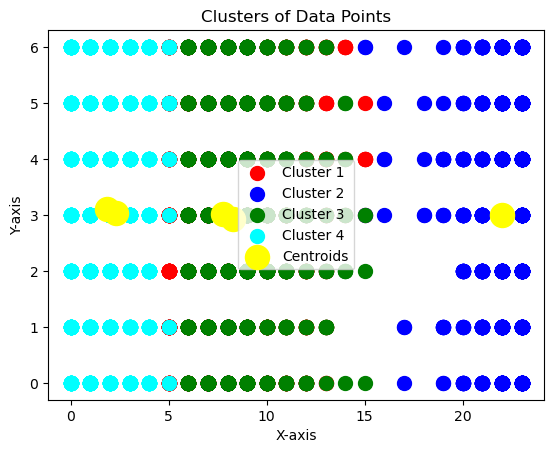

In [77]:
#visualizing the cluster
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [78]:
cluster_summary = df.select_dtypes(include=np.number).groupby('cluster').mean()
print(cluster_summary)

         post_hour  post_day  post_month  num_likes_log  num_loves_box  \
cluster                                                                  
0         7.793422  3.008078    3.557992       0.230415       0.197674   
1        22.009928  3.001805    6.273466       0.076377      -0.043659   
2         8.286026  2.920670   10.003639      -0.243933      -0.124037   
3         1.846815  3.113815    3.659986       0.058816       0.044958   
4         2.322670  3.027816   10.012517      -0.160597      -0.129746   

         num_wows_box  num_hahas_box  num_sads_box  num_angrys_box  \
cluster                                                              
0            0.202113       0.176587      0.133278        0.174991   
1           -0.051724      -0.106351     -0.075282       -0.085431   
2           -0.087324      -0.025647      0.079653       -0.025865   
3            0.049307       0.019852     -0.092584       -0.011514   
4           -0.168185      -0.125650     -0.088778       -0.1

In [79]:
# Step 3: Add cluster assignments back to the original df (optional, but useful for exploring)
# Ensure the index aligns if you haven't modified the order of the original df rows
df['cluster'] = y_kmeans
df.head()

# Step 4: Explore categorical features per cluster (e.g., status_type distribution)
status_type_cols = [col for col in df.columns if 'status_type_' in col]
print("\nStatus Type distribution within each cluster:")
print(df.groupby('cluster')[status_type_cols].sum())

# Example: Proportion of status types within each cluster
print("\nProportion of Status Type within each cluster:")
print(df.groupby('cluster')[status_type_cols].sum().apply(lambda x: x / x.sum(), axis=1))


Status Type distribution within each cluster:
         status_type_link  status_type_photo  status_type_status  \
cluster                                                            
0                      22                912                  76   
1                      18                750                  71   
2                       6                840                  65   
3                       9                868                  64   
4                       8                918                  89   

         status_type_video  
cluster                     
0                      723  
1                      269  
2                      463  
3                      456  
4                      423  

Proportion of Status Type within each cluster:
         status_type_link  status_type_photo  status_type_status  \
cluster                                                            
0                0.012695           0.526255            0.043855   
1                0.01

In [80]:
# Step 5: Calculate Silhouette Score (Optional)
from sklearn.metrics import silhouette_score

# The silhouette score is calculated on the data used for clustering (X_scaled in your case)
# and the predicted cluster labels (y_kmeans)
score = silhouette_score(X, y_kmeans)
print(f"\nSilhouette Score: {score}")

# Note: A higher silhouette score generally indicates better-defined clusters.
# Interpretation depends on the data, but scores range from -1 to 1.
# Closer to 1 means data points are well within their own cluster and far from other clusters.
# Closer to 0 means data points are close to the decision boundary of neighboring clusters.
# Negative values mean data points might have been assigned to the wrong cluster.


Silhouette Score: 0.2969614650268608


# DBSCAN Clustering

In [81]:
Y = X

**Modeling**

In [82]:
#import
from sklearn.cluster import DBSCAN

#save
dbs = DBSCAN(eps=3, min_samples=5)

#fit
z_dbs = dbs.fit(Y)

In [83]:
df['cluster1'] = pd.DataFrame(z_dbs.labels_)
df

,status_published,post_hour,post_day,post_month,num_likes_log,num_loves_box,num_wows_box,num_hahas_box,num_sads_box,num_angrys_box,total_engagement_box,status_type_link,status_type_photo,status_type_status,status_type_video,cluster,cluster1
0,2018-04-22 06:00:00,6,6,4,1.188102,1.512520,1.770333,2.276237,3.257940,-0.252646,1.337542,False,False,False,True,0,0
1,2018-04-21 22:45:00,22,5,4,0.565108,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.213846,False,True,False,False,1,1
2,2018-04-21 06:17:00,6,5,4,0.745911,1.367905,1.701607,2.276237,-0.306938,-0.252646,0.835813,False,False,False,True,0,2
3,2018-04-21 02:29:00,2,5,4,0.388415,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,0.072438,False,True,False,False,3,2
4,2018-04-18 03:22:00,3,2,4,0.745911,1.262238,-0.572764,-0.437816,-0.306938,-0.252646,0.382955,False,True,False,False,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,2016-09-24 02:58:00,2,5,9,0.259086,-0.807451,-0.572764,-0.437816,-0.306938,-0.252646,-0.029117,False,True,False,False,4,2
7046,2016-09-23 11:19:00,11,4,9,-0.800525,0.883096,-0.572764,2.276237,-0.306938,-0.252646,-0.758745,False,True,False,False,2,-1
7047,2016-09-21 23:03:00,23,2,9,-1.992099,0.883096,-0.572764,-0.437816,-0.306938,-0.252646,-1.515463,False,True,False,False,1,1
7048,2016-09-20 00:43:00,0,1,9,1.062254,1.021675,-0.572764,-0.437816,-0.306938,-0.252646,0.679613,False,True,False,False,4,2


In [84]:
df['cluster1'].unique()

array([ 0,  1,  2,  3,  4,  7, -1, 11,  9,  5,  6, 12,  8, 10])

In [85]:
# Get numerical columns from df1
numerical_df1 = df.select_dtypes(include=np.number)

    # Group by the DBSCAN cluster assignments and calculate the mean for each cluster
    # Include numerical columns from df1 to see average values within each cluster
dbscan_cluster_summary = df.groupby('cluster1').mean()
print("DBSCAN Cluster Summary (Mean values per cluster):")
print(dbscan_cluster_summary)

    # You can also look at the size of each cluster
print("\nDBSCAN Cluster Sizes:")
print(df['cluster1'].value_counts().sort_index())

DBSCAN Cluster Summary (Mean values per cluster):
                      status_published  post_hour  post_day  post_month  \
cluster1                                                                  
-1       2017-11-16 22:35:26.060605952  12.171717  2.848485    6.540404   
 0       2017-11-04 21:31:38.947368448   5.768421  2.985965    6.908772   
 1       2016-10-07 14:58:07.852147968  22.050949  3.025974    6.269730   
 2       2016-09-29 03:33:12.310048000   5.100861  3.014354    6.657033   
 3       2018-02-17 22:44:29.361702144   1.021277  3.212766    3.170213   
 4       2018-03-31 16:24:58.775510272   7.326531  2.653061    3.693878   
 5       2017-09-21 01:10:40.000000000   0.833333  4.166667   11.000000   
 6       2017-01-07 02:33:12.857143040  20.928571  2.714286   10.000000   
 7       2018-02-08 11:27:42.248520704   6.958580  3.295858    6.011834   
 8       2017-03-06 04:40:40.000000000  12.333333  4.333333   10.666667   
 9       2017-11-08 03:44:26.086956544   1.391304 

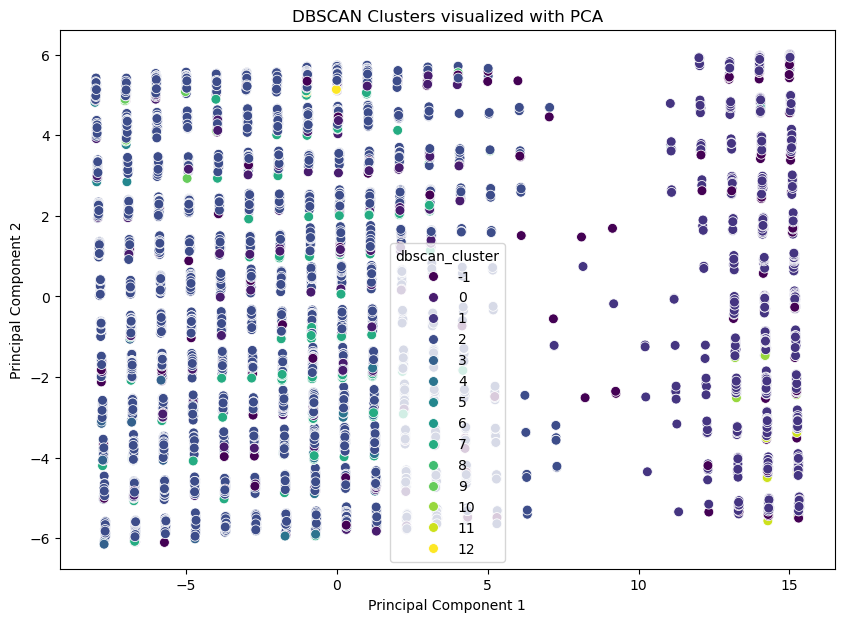

In [86]:
# You clustered on Y, which is the scaled transformed data
    # To visualize, you can use Principal Component Analysis (PCA) to reduce dimensions to 2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

    # Apply PCA to reduce the scaled data Y to 2 components for visualization
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)

    # Add the PCA components and DBSCAN cluster labels to a temporary DataFrame for easy plotting
pca_df = pd.DataFrame(data = Y_pca, columns = ['pca_component_1', 'pca_component_2'])
pca_df['dbscan_cluster'] = z_dbs.labels_ # Use labels_ from the fitted object

    # Visualize the clusters using the PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='dbscan_cluster', data=pca_df, palette='viridis', legend='full', s=50)
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [87]:
# Assuming 'cluster' is the K-Means cluster column in df
print("\nStatus Type Distribution within K-Means Clusters:")
status_type_cols = [col for col in df.columns if 'status_type_' in col]
for col in status_type_cols:
    print(f"\nDistribution of {col} within K-Means Clusters:")
    print(df.groupby('cluster')[col].value_counts(normalize=True))


# Assuming 'cluster1' is the DBSCAN cluster column in df
print("\nStatus Type Distribution within DBSCAN Clusters:")
status_type_cols = [col for col in df.columns if 'status_type_' in col]
for col in status_type_cols:
    print(f"\nDistribution of {col} within DBSCAN Clusters:")
    print(df.groupby('cluster1')[col].value_counts(normalize=True))


# Consider the noise cluster (-1) specifically for DBSCAN
print("\nStatus Type Distribution in DBSCAN Noise Points (-1):")
noise_df = df[df['cluster1'] == -1]
if not noise_df.empty:
    status_type_cols = [col for col in noise_df.columns if 'status_type_' in col]
    for col in status_type_cols:
        print(f"\nDistribution of {col} in Noise Points:")
        print(noise_df[col].value_counts(normalize=True))
else:
    print("No noise points found in DBSCAN clustering.")


Status Type Distribution within K-Means Clusters:

Distribution of status_type_link within K-Means Clusters:
cluster  status_type_link
0        False               0.987305
         True                0.012695
1        False               0.983755
         True                0.016245
2        False               0.995633
         True                0.004367
3        False               0.993558
         True                0.006442
4        False               0.994437
         True                0.005563
Name: proportion, dtype: float64

Distribution of status_type_photo within K-Means Clusters:
cluster  status_type_photo
0        True                 0.526255
         False                0.473745
1        True                 0.676895
         False                0.323105
2        True                 0.611354
         False                0.388646
3        True                 0.621331
         False                0.378669
4        True                 0.638387
         Fals

In [89]:
import joblib

# Save the fitted DBSCAN model
joblib.dump(z_dbs, 'dbscan_model.pkl')
print("DBSCAN model saved as dbscan_model.pkl")

DBSCAN model saved as dbscan_model.pkl


# Analyzing K-Means Clusters:

**Looking at the cluster_summary for K-Means:**

**Cluster 0: Shows relatively higher average values for total_engagement_box (0.232880), num_likes_box (0.227248), num_loves_box (0.227163), num_wows_box (0.243799), num_hahas_box (0.213016), and num_angrys_box (0.200346) compared to other clusters, except for num_sads_box. The status type distribution in cell  for Cluster 0 shows a significant proportion of status_type_video (0.423594) and status_type_photo (0.520782).**

**Cluster 2: Has a total_engagement_box close to zero (0.007643). The engagement metrics are generally lower than Cluster 0. This cluster has the highest proportion of status_type_photo (0.676895).
Other K-Means clusters (1, 3, 4) generally show lower average engagement metrics.**

**Based on this, K-Means Cluster 0 appears to represent posts with higher overall engagement, and these are predominantly photo and video posts.**

# Analyzing DBSCAN Clusters:

**Looking at the dbscan_cluster_summary and output:**

**Cluster -1 (Noise): This cluster contains outliers. While the average engagement metrics for this cluster might not be the highest overall, individual posts within this cluster could be exceptionally high or low in engagement.**

**Cluster 0: Shows high average values for total_engagement_box (1.117392), num_likes_box (0.596966), num_loves_box (1.185228), num_wows_box (0.820890), and num_hahas_box (1.167556). This cluster is dominated by status_type_video (0.715789).**

**Cluster 3, 4, 5, 7, 9, 10, 11, 12: Several smaller DBSCAN clusters also show high average engagement metrics, particularly for total_engagement_box, num_loves_box, num_wows_box, and num_hahas_box.**

**These clusters are almost exclusively status_type_video.**

**Cluster 1 and 2: These are the largest DBSCAN clusters and generally show lower average engagement metrics compared to the high-engagement clusters. They are predominantly status_type_photo.**

**Comparison and Conclusion:**

**K-Means identified one main cluster (Cluster 0) with relatively higher engagement, consisting of a mix of photo and video posts. The other clusters represent lower engagement levels.**

**DBSCAN identified a large number of smaller clusters with very high average engagement, which are almost entirely video posts. It also identified larger clusters with lower engagement, primarily photo posts, and a noise cluster.**

**Which is better for identifying high-performing posts?**

**DBSCAN appears to be more effective at isolating distinct groups of very high-engagement posts, particularly those that are videos. The smaller, high-engagement DBSCAN clusters (0, 3, 4, 5, 7, 9, 10, 11, 12) have significantly higher average engagement metrics compared to the highest engagement cluster found by K-Means (Cluster 0). This suggests that DBSCAN is better at identifying the specific characteristics of exceptionally high-performing content (primarily videos with high love, wow, and haha reactions).**

**K-Means provides a broader grouping of posts with relatively higher engagement, which includes both photos and videos. While useful for a general understanding, it doesn't highlight the most impactful posts as distinctly as DBSCAN does.**

**Therefore, for the goal of understanding which types of posts lead to higher engagement, DBSCAN seems to provide more specific insights, particularly highlighting the success of video content in generating high levels of "love", "wow", and "haha" reactions.**

# Final Steps:

**The analysis is largely complete. The final steps involve summarizing these findings and providing actionable recommendations based on the DBSCAN results:**

**Summarize DBSCAN Findings:** Clearly articulate the characteristics of the high-engagement DBSCAN clusters (primarily video posts with high love, wow, and haha reactions). Also, describe the characteristics of the lower-engagement clusters (primarily photo posts).

**Provide Actionable Recommendations:** Based on the findings, recommend that online retailers focus on creating more video content that is likely to evoke positive emotional responses (love, wow, haha) to boost engagement. Suggest analyzing the specific content of posts in the high-engagement clusters to identify common themes or styles.

**Consider the Noise Cluster:** Briefly mention that the noise cluster (-1) might contain other interesting outliers (both high and low engagement) that could warrant further individual investigation.

**Present the Conclusion:** Conclude by stating that video content, particularly that which elicits strong positive reactions, is a key driver of high engagement for Facebook Live sellers in Thailand based on this clustering analysis.